### **Nombre:** Elda Magally Calderón Motta
### **Carné:** 16003182
### **Sección:** Virtual

# Proyecto Final Statistical Learning I

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
pip install tensorboard_logger

Note: you may need to restart the kernel to use updated packages.


In [763]:
import numpy as np
import pandas as pd
import sklearn as sl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from scipy import stats

In [6]:
data = pd.read_csv('data_titanic_proyecto.csv')  
print(data)

     PassengerId                                               Name   Age  \
0              1                            Braund, Mr. Owen Harris  22.0   
1              2  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2              3                             Heikkinen, Miss. Laina  26.0   
3              4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4              5                           Allen, Mr. William Henry  35.0   
..           ...                                                ...   ...   
886          887                              Montvila, Rev. Juozas  27.0   
887          888                       Graham, Miss. Margaret Edith  19.0   
888          889           Johnston, Miss. Catherine Helen "Carrie"   NaN   
889          890                              Behr, Mr. Karl Howell  26.0   
890          891                                Dooley, Mr. Patrick  32.0   

     SibSp  Parch            Ticket     Fare Cabin Embarked passenger_class

## Division de la data en Train, Test, Validation

In [7]:
Train, Test = train_test_split(data, test_size=0.20, shuffle=True)

In [8]:
Train, Validation = train_test_split(Train, test_size=0.20, shuffle=True)

## Analisis Exploratorio de la Data

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 755 to 697
Data columns (total 12 columns):
PassengerId           569 non-null int64
Name                  569 non-null object
Age                   454 non-null float64
SibSp                 569 non-null int64
Parch                 569 non-null int64
Ticket                569 non-null object
Fare                  569 non-null float64
Cabin                 120 non-null object
Embarked              568 non-null object
passenger_class       569 non-null object
passenger_sex         569 non-null object
passenger_survived    569 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 57.8+ KB


In [10]:
Train.describe()

PassengerId         Age       SibSp       Parch        Fare
count   569.000000  454.000000  569.000000  569.000000  569.000000
mean    446.203866   29.883634    0.521968    0.391916   31.191153
std     256.443657   14.930838    1.106937    0.808845   49.167997
min       1.000000    0.420000    0.000000    0.000000    0.000000
25%     226.000000   20.625000    0.000000    0.000000    8.050000
50%     441.000000   28.250000    0.000000    0.000000   14.454200
75%     670.000000   39.000000    1.000000    0.000000   30.000000
max     891.000000   80.000000    8.000000    5.000000  512.329200

## Tratando datos NAN

In [11]:
Train.isnull().sum()

PassengerId             0
Name                    0
Age                   115
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 449
Embarked                1
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [12]:
Test.isnull().sum()

PassengerId             0
Name                    0
Age                    31
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 129
Embarked                1
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

In [13]:
Validation.isnull().sum()

PassengerId             0
Name                    0
Age                    31
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 109
Embarked                0
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

* Dada la cantidad elevada de datos NAN en la variable Cabin, la misma no se considerará dentro del análisis, ya que para lod datos de Train hay 428 de 569 registros (alrededor del 78%) que no tienen información.

* Para la edad, se sustituirán los datos NAN con la media de la columna.

* Para Embarked, como solo hay un dato NAN se usará el valor de la fila anterior para sustituir.

### Datos Train

In [14]:
mediaTrain = int(Train.iloc[:,2].mean())
print(mediaTrain)

29


In [15]:
Train.iloc[:,2] = Train.iloc[:,2].fillna(mediaTrain)

In [16]:
Train.iloc[:,8].isna()[Train.iloc[:,8].isna()==True]

61    True
Name: Embarked, dtype: bool

In [18]:
Train.iloc[:,8] = Train.iloc[:,8].fillna("S")

In [19]:
Train.isnull().sum()

PassengerId             0
Name                    0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 449
Embarked                0
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

### Datos Test

In [20]:
mediaTest = int(Train.iloc[:,2].mean())
print(mediaTest)

29


In [22]:
Test.iloc[:,2] = Test.iloc[:,2].fillna(mediaTest)

In [23]:
Test.iloc[:,8].isna()[Test.iloc[:,8].isna()==True]

829    True
Name: Embarked, dtype: bool

In [26]:
Test.iloc[:,8] = Test.iloc[:,8].fillna("C")

In [27]:
Test.isnull().sum()

PassengerId             0
Name                    0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 129
Embarked                0
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

### Datos Validation

In [28]:
mediaValidation = int(Validation.iloc[:,2].mean())
print(mediaValidation)

29


In [29]:
Validation.iloc[:,2] = Validation.iloc[:,2].fillna(mediaValidation)

In [30]:
Validation.isnull().sum()

PassengerId             0
Name                    0
Age                     0
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 109
Embarked                0
passenger_class         0
passenger_sex           0
passenger_survived      0
dtype: int64

## Convirtiendo variables categoricas a One-hot-encoding

### Datos Train

In [31]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 755 to 697
Data columns (total 12 columns):
PassengerId           569 non-null int64
Name                  569 non-null object
Age                   569 non-null float64
SibSp                 569 non-null int64
Parch                 569 non-null int64
Ticket                569 non-null object
Fare                  569 non-null float64
Cabin                 120 non-null object
Embarked              569 non-null object
passenger_class       569 non-null object
passenger_sex         569 non-null object
passenger_survived    569 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 77.8+ KB


In [32]:
Train.iloc[:,8].unique()

array(['S', 'C', 'Q'], dtype=object)

In [33]:
pd.get_dummies(Train.iloc[:,8], prefix = 'Embarked')
pd.get_dummies(Train.iloc[:,9], prefix = 'class')
pd.get_dummies(Train.iloc[:,10], prefix = 'sex')
pd.get_dummies(Train.iloc[:,11], prefix = 'survived')

survived_N  survived_Y
755           0           1
605           1           0
65            0           1
520           0           1
159           1           0
..          ...         ...
717           0           1
707           0           1
90            1           0
827           0           1
697           0           1

[569 rows x 2 columns]

In [34]:
Train2 = pd.concat([Train, 
                    pd.get_dummies(Train.iloc[:,8], prefix = 'Embarked'),
                    pd.get_dummies(Train.iloc[:,9], prefix = 'class'),
                    pd.get_dummies(Train.iloc[:,10], prefix = 'sex'),
                    pd.get_dummies(Train.iloc[:,11], prefix = 'survived')], axis = 1)

### Datos Test

In [35]:
pd.get_dummies(Test.iloc[:,8], prefix = 'Embarked')
pd.get_dummies(Test.iloc[:,9], prefix = 'class')
pd.get_dummies(Test.iloc[:,10], prefix = 'sex')
pd.get_dummies(Test.iloc[:,11], prefix = 'survived')

survived_N  survived_Y
572           0           1
672           1           0
10            0           1
42            1           0
456           1           0
..          ...         ...
149           1           0
807           1           0
825           1           0
496           0           1
93            1           0

[179 rows x 2 columns]

In [36]:
Test2 = pd.concat([Test, 
                    pd.get_dummies(Test.iloc[:,8], prefix = 'Embarked'),
                    pd.get_dummies(Test.iloc[:,9], prefix = 'class'),
                    pd.get_dummies(Test.iloc[:,10], prefix = 'sex'),
                    pd.get_dummies(Test.iloc[:,11], prefix = 'survived')], axis = 1)

### Datos Validation

In [37]:
pd.get_dummies(Validation.iloc[:,8], prefix = 'Embarked')
pd.get_dummies(Validation.iloc[:,9], prefix = 'class')
pd.get_dummies(Validation.iloc[:,10], prefix = 'sex')
pd.get_dummies(Validation.iloc[:,11], prefix = 'survived')

survived_N  survived_Y
356           0           1
766           1           0
137           1           0
510           0           1
665           1           0
..          ...         ...
243           1           0
167           1           0
127           0           1
337           0           1
833           1           0

[143 rows x 2 columns]

In [38]:
Validation2 = pd.concat([Validation, 
                         pd.get_dummies(Validation.iloc[:,8], prefix = 'Embarked'),
                         pd.get_dummies(Validation.iloc[:,9], prefix = 'class'),
                         pd.get_dummies(Validation.iloc[:,10], prefix = 'sex'),
                         pd.get_dummies(Validation.iloc[:,11], prefix = 'survived')], axis = 1)

## Modelos con Datos Train

### Algortimo Arbol de Decision

In [764]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [40]:
Train.groupby('passenger_survived').size()

passenger_survived
N    358
Y    211
dtype: int64

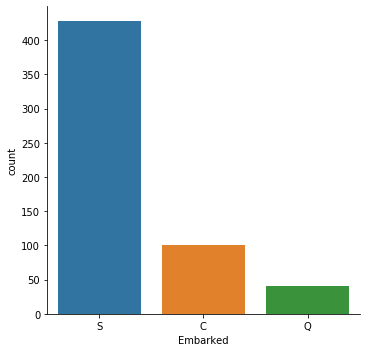

In [42]:
import seaborn as sb
sb.factorplot('Embarked',data=Train,kind="count")

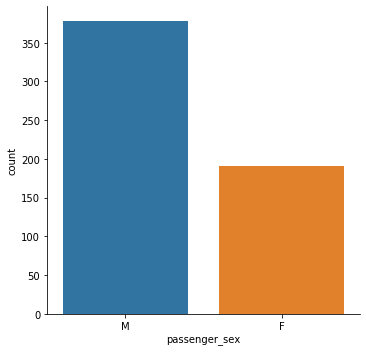

In [43]:
sb.factorplot('passenger_sex',data=Train,kind="count")

In [558]:
#Funcion arbol de decision

def train_tree(X, Y, X_predict, Y_true, depth):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    #prediction2 = tf.get_variable(dtype=tf.float32, initializer=tf.zeros_initializer(), 
                                  #shape=[np.shape(prediction)[0]], name = "Variable_Predict")

    with tf.name_scope("Metrics_Decision_Tree_Train"):
        #prediction2 = prediction2.assign(prediction, name = "Prediction")
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        #session.run(prediction2)
        writer = tf.summary.FileWriter(('./Train_Model_Decision_Tree_'+'Depth='+str(depth)), session.graph)
    
        for i in range(10):
    
            #accuracy = accuracy_score(y_true, session.run(prediction2), normalize=True) 
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

        
      
    print(accuracy)
    return (prediction)
    

In [559]:
train_tree(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Train2.iloc[:,21]), 6)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8488576449912126


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,

### Algoritmo SVM

In [636]:
def train_SVM(X, Y, X_predict, Y_true, C, degree):
    clf = svm.SVC(kernel = 'poly', C = C, degree=degree)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_SVM_Train"):
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Train_Model_SVM_'+'C='+str(C)+'_Degree='+str(degree)), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    print(accuracy)
    
    #print(confusion_matrix(y_true,prediction))
    print(classification_report(y_true,prediction))
        
    return (prediction)
    

In [637]:
train_SVM(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Train2.iloc[:,21]), 100, 3)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.81195079086116
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       358
           1       0.82      0.63      0.71       211

    accuracy                           0.81       569
   macro avg       0.81      0.77      0.79       569
weighted avg       0.81      0.81      0.81       569



array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,

### Algoritmo Naive Bayes

In [738]:
def train_naive_bayes(X, Y, predict, y_true):
    
    data = pd.concat([X,Y],axis=1)
    
    #Probabilidades Variables Categoricas
    
    #Embarked
    PECY = (len(X[(X.iloc[:,1] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PEQY = (len(X[(X.iloc[:,2] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PESY = (len(X[(X.iloc[:,3] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PECN = (len(X[(X.iloc[:,1] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PEQN = (len(X[(X.iloc[:,2] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PESN = (len(X[(X.iloc[:,3] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Class
    PCLY = (len(X[(X.iloc[:,4] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCMY = (len(X[(X.iloc[:,5] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCUY = (len(X[(X.iloc[:,6] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PCLN = (len(X[(X.iloc[:,4] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCMN = (len(X[(X.iloc[:,5] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCUN = (len(X[(X.iloc[:,6] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Sex
    PSFY = (len(X[(X.iloc[:,7] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSMY = (len(X[(X.iloc[:,8] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSFN = (len(X[(X.iloc[:,7] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PSMN = (len(X[(X.iloc[:,8] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 

    #Probabilidad Edad
    desY = data.iloc[:,0][data.iloc[:,9] == 1].std()
    mediaY = data.iloc[:,0][data.iloc[:,9] == 1].mean()

    desN = data.iloc[:,0][data.iloc[:,9] == 0].std()
    mediaN = data.iloc[:,0][data.iloc[:,9] == 0].mean()

    PEdadY = np.exp(-np.power((X.iloc[:,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadN = np.exp(-np.power((X.iloc[:,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))

    #Probabilidad Y/N
    PY = len(data[(data.iloc[:,9] == 1)]) / len(X)
    PN = len(data[(data.iloc[:,9] == 0)]) / len(X)

    #Vectores Y/N
    vector_yes = np.array([[PECY, PEQY, PESY, PCLY, PCMY, PCUY, PSFY, PSMY]])
    vector_no = np.array([[PECN, PEQN, PESN, PCLN, PCMN, PCUN, PSFN, PSMN]])

    #Calculo Probabilidad
    matriz_yes = pd.concat([PEdadY, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_yes], axis = 1) 
    matriz_no = pd.concat([PEdadN, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_no], axis = 1) 
    
    
    b = matriz_yes[matriz_yes != 0].fillna(1)
    n = np.shape(matriz_yes)[1]
    a = b.iloc[:,0]
    for i in range(1, n):
        a = a * b.iloc[:,i]
    
    
    d = matriz_no[matriz_no != 0].fillna(1)
    c = d.iloc[:,0]
    for i in range(1, n):
        c = c * d.iloc[:,i]
    
    
    PYF = a * PY
    PNF = c * PN
    
    
    #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

    #Matriz Probabilidades
    matriz = pd.concat([PTN,PTY],axis=1)
    matriz.columns = [0,1]

    #Prediccion
    prediction = matriz.idxmax(axis = 1) 
    
    
    
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Naive_Bayes_Train"):
        
        confusion = tf.math.confusion_matrix(y_true, prediction)
        
        # Accuracy
        accuracy = (len(predict) - np.sum(np.abs(prediction - y_true))) / len(predict)
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = 2 * (precision * recall) / (precision + recall)
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        print(session.run(confusion))
        print(session.run(precision))
        print(session.run(recall))
        print(session.run(f1))

        writer = tf.summary.FileWriter(('./Train_Model_NBayes'), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    print(accuracy)
    print("medias")
    print(mediaY)
    print(desY)
    print(mediaN)
    print(desN)
    print(PY)
    print(PN)
    return (prediction)
        

In [739]:
train_naive_bayes(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
                  Train2.iloc[:,21], 
                  Train2.iloc[:,[2,12,13,14,15,16,17,18,19]],
                  Train2.iloc[:,21])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[297  61]
 [ 61 150]]
0.8296089385474861
0.8296089385474861
0.8296089385474861
0.7855887521968365
medias
28.451042654028438
14.329399311275456
30.44413407821229
12.681387879400225
0.37082601054481545
0.6291739894551845


755    0
605    0
65     0
520    1
159    0
      ..
717    1
707    0
90     0
827    1
697    1
Length: 569, dtype: int64

### Algoritmo Regresión Logística

In [183]:
def train_reg_logistic(lr, epochs, batch, one_hot, matriz_X, matriz_test, hotTest, L1, L2):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    n = len(matriz_X)
    shape = np.shape(matriz_X)
    total_iteraciones = int(n/batch)
    
    
    with g.as_default():
   
        matriz_x = tf.placeholder(dtype=tf.float32, shape=[None,shape[1]], name = "matriz_x")
        matriz_w = tf.get_variable(dtype=tf.float32, initializer=tf.truncated_normal,shape=[shape[1],2], name = "matriz_w")
        intercepto = tf.get_variable(dtype=tf.float32, shape=[2], initializer=tf.zeros_initializer(), name="Intercepto")
        m_OneHot = tf.placeholder(dtype=tf.float32, shape=[None,2], name = "matriz_one_hot")
        m_OneHotTest = tf.placeholder(dtype=tf.float32, shape=[None,2])

    
        with tf.name_scope("Hipotesis"):
            logit = tf.matmul(matriz_x, matriz_w, name = "Logit") + intercepto
            costo = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = m_OneHot), 
                                   name = "Costo") + L1 * tf.reduce_sum(tf.math.abs(matriz_w)) + L2 * tf.reduce_sum(tf.math.pow(matriz_w,2))
            scalar_costo = tf.summary.scalar('Costo Modelo RL', costo)

    
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [matriz_w], name = "Gradient")
            gradiente2 = gradiente[0]
    

        with tf.name_scope("Parametros"):
            w_actual = tf.add(tf.multiply(gradiente2, -lr), matriz_w)
            matriz_w = matriz_w.assign(w_actual)
    
    
        prediccionT = tf.nn.sigmoid(logit, name = "Prediccion")
    
        #-------------------TENSORFLOW METRICS-------------------#
    
        with tf.name_scope("Metrics_Regresion_Logistic_Train"):
            confusion = tf.math.confusion_matrix(one_hot.iloc[:,1], prediccionT[:,1])
        
            # Accuracy
            accuracy = (confusion[0,0] + confusion[1,1]) / len(one_hot)
            scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

            # Error
            error = 1 - accuracy
            scalar_error = tf.summary.scalar('Scalar_Error', error)

            # Precision
            precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
            scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

            # Recall
            recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
            scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

            # F1-Score
            f1 = 2 * (precision * recall) / (precision + recall)
            scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

        
        with tf.train.MonitoredSession() as session:
            
            writer = tf.summary.FileWriter(('./Train_Reg_Logistic'+'_Epochs='+str(epochs)
                                            +'_Batch='+str(batch)+'_LR='+str(lr)
                                            +'_Reg_L1='+str(L1)+'_Reg_L2='+str(L2)), session.graph)

            for i in range(epochs):
    
                feed_dict = {matriz_x: matriz_X, m_OneHot: one_hot}
                print(session.run(costo, feed_dict = feed_dict))
                session.run(logit, feed_dict = feed_dict)
                sc = session.run(scalar_costo,feed_dict=feed_dict)
                #writer.add_summary(sc, epochs+1)
                
                sa = session.run(scalar_accuracy, feed_dict = feed_dict)
                se = session.run(scalar_error, feed_dict = feed_dict)
                sp = session.run(scalar_precision, feed_dict = feed_dict)
                sr = session.run(scalar_recall, feed_dict = feed_dict)
                sf = session.run(scalar_f1, feed_dict = feed_dict)
                writer.add_summary(sa, epochs+1)
                writer.add_summary(se, epochs+1)
                writer.add_summary(sp, epochs+1)
                writer.add_summary(sr, epochs+1)
                writer.add_summary(sf, epochs+1)

                
                for j in range(total_iteraciones):   
                    muestra_inicio = j*batch
                    muestra_fin = muestra_inicio + batch
                    X =  matriz_X[muestra_inicio:muestra_fin]
                    hot = one_hot[muestra_inicio:muestra_fin]
      
                    feed_dict2 = {matriz_x: X, m_OneHot: hot}
                    session.run(gradiente, feed_dict = feed_dict2)
                    session.run(w_actual, feed_dict = feed_dict2)
                    session.run(matriz_w, feed_dict = feed_dict2)
                    
                
                    p = session.run(prediccionT, feed_dict = feed_dict)
            
            #Prediccion
            feed_dict3 = {matriz_x: matriz_test, m_OneHot: hotTest}
            session.run(costo, feed_dict = feed_dict)
            session.run(logit, feed_dict = feed_dict)
            predict = session.run(prediccionT, feed_dict = feed_dict)
            num = np.argmax(predict,axis=1).reshape(1,-1)
            
            print("Accuracy:")
            print(session.run(accuracy, feed_dict = feed_dict))
            print(session.run(confusion, feed_dict = feed_dict))


            return(num)
    

In [189]:
train_reg_logistic(0.01, 5, 100, 
             Train2.iloc[:,[20,21]], 
             Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Train2.iloc[:,[20,21]], 0, 0)

INFO:tensorflow:Summary name Costo Modelo RL is illegal; using Costo_Modelo_RL instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
11.427433
5.560026
3.5549998
2.2025456
0.9212649
Accuracy:
0.6291739894551845
[[358   0]
 [211   0]]


array([[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 

## Modelos con Datos Validation

### Algortimo Arbol de Decision

In [596]:
#Funcion arbol de decision

def validation_tree(X, Y, X_predict, Y_true, depth):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Decision_Tree_Validation"):
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Validation_Model_Decision_Tree_'+'Depth='+str(depth)), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    print(accuracy)
    return (prediction)
    

In [600]:
validation_tree(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Validation2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Validation2.iloc[:,21]), 10)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7902097902097902


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=uint8)

### Algoritmo SVM

In [641]:

def validation_SVM(X, Y, X_predict, Y_true, C, degree):
    clf = svm.SVC(kernel = 'poly', C = C, degree=degree)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_SVM_Validation"):
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Validation_Model_SVM_'+'C='+str(C)+'_Degree='+str(degree)), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    print(accuracy)
    
    #print(confusion_matrix(y_true,prediction))
    print(classification_report(y_true,prediction))
        
    return (prediction)
    

In [640]:
validation_SVM(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Validation2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Validation2.iloc[:,21]), 100, 3)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.7762237762237763
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        83
           1       0.82      0.60      0.69        60

    accuracy                           0.78       143
   macro avg       0.79      0.75      0.76       143
weighted avg       0.78      0.78      0.77       143



array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0], dtype=uint8)

In [201]:
def validation_naive_bayes(X, Y, predict, y_true):
    
    data = pd.concat([X,Y],axis=1)
    
    #Probabilidades Variables Categoricas
    
    #Embarked
    PECY = (len(X[(X.iloc[:,1] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PEQY = (len(X[(X.iloc[:,2] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PESY = (len(X[(X.iloc[:,3] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PECN = (len(X[(X.iloc[:,1] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PEQN = (len(X[(X.iloc[:,2] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PESN = (len(X[(X.iloc[:,3] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Class
    PCLY = (len(X[(X.iloc[:,4] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCMY = (len(X[(X.iloc[:,5] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCUY = (len(X[(X.iloc[:,6] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PCLN = (len(X[(X.iloc[:,4] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCMN = (len(X[(X.iloc[:,5] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCUN = (len(X[(X.iloc[:,6] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Sex
    PSFY = (len(X[(X.iloc[:,7] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSMY = (len(X[(X.iloc[:,8] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSFN = (len(X[(X.iloc[:,7] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PSMN = (len(X[(X.iloc[:,8] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 

    #Probabilidad Edad
    desY = data.iloc[:,0][data.iloc[:,9] == 1].std()
    mediaY = data.iloc[:,0][data.iloc[:,9] == 1].mean()

    desN = data.iloc[:,0][data.iloc[:,9] == 0].std()
    mediaN = data.iloc[:,0][data.iloc[:,9] == 0].mean()

    PEdadY = np.exp(-np.power((X.iloc[:,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadN = np.exp(-np.power((X.iloc[:,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))

    #Probabilidad Y/N
    PY = len(data[(data.iloc[:,9] == 1)]) / len(X)
    PN = len(data[(data.iloc[:,9] == 0)]) / len(X)

    #Vectores Y/N
    vector_yes = np.array([[PECY, PEQY, PESY, PCLY, PCMY, PCUY, PSFY, PSMY]])
    vector_no = np.array([[PECN, PEQN, PESN, PCLN, PCMN, PCUN, PSFN, PSMN]])

    #Calculo Probabilidad
    matriz_yes = pd.concat([PEdadY, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_yes], axis = 1) 
    matriz_no = pd.concat([PEdadN, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_no], axis = 1) 
    
    
    b = matriz_yes[matriz_yes != 0].fillna(1)
    n = np.shape(matriz_yes)[1]
    a = b.iloc[:,0]
    for i in range(1, n):
        a = a * b.iloc[:,i]
    
    
    d = matriz_no[matriz_no != 0].fillna(1)
    c = d.iloc[:,0]
    for i in range(1, n):
        c = c * d.iloc[:,i]
    
    
    PYF = a * PY
    PNF = c * PN
    
    
    #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

    #Matriz Probabilidades
    matriz = pd.concat([PTN,PTY],axis=1)
    matriz.columns = [0,1]

    #Prediccion
    prediction = matriz.idxmax(axis = 1) 
    
    
    #-------------------------------------------------------Datos Validation--------------------------------------------#
    
    data2 = pd.concat([predict,y_true],axis=1)

    #Probabilidad Edad
    desY = data2.iloc[:,0][data2.iloc[:,9] == 1].std()
    mediaY = data2.iloc[:,0][data2.iloc[:,9] == 1].mean()

    desN = data2.iloc[:,0][data2.iloc[:,9] == 0].std()
    mediaN = data2.iloc[:,0][data2.iloc[:,9] == 0].mean()

    PEdadYT = np.exp(-np.power((predict.iloc[:,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadNT = np.exp(-np.power((predict.iloc[:,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))

    
    #Calculo Probabilidad
    matriz_yes = pd.concat([PEdadYT, predict.iloc[:,[1,2,3,4,5,6,7,8]] * vector_yes], axis = 1) 
    matriz_no = pd.concat([PEdadNT, predict.iloc[:,[1,2,3,4,5,6,7,8]] * vector_no], axis = 1) 
    
    
    b = matriz_yes[matriz_yes != 0].fillna(1)
    n = np.shape(matriz_yes)[1]
    a = b.iloc[:,0]
    for i in range(1, n):
        a = a * b.iloc[:,i]
    
    
    d = matriz_no[matriz_no != 0].fillna(1)
    c = d.iloc[:,0]
    for i in range(1, n):
        c = c * d.iloc[:,i]
    
    
    PYF = a * PY
    PNF = c * PN
    
    
    #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

    #Matriz Probabilidades
    matriz = pd.concat([PTN,PTY],axis=1)
    matriz.columns = [0,1]

    #Prediccion
    prediction_validation = matriz.idxmax(axis = 1) 
    
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Naive_Bayes_Validation"):
        
        confusion = tf.math.confusion_matrix(y_true, prediction_validation)
        
        # Accuracy
        accuracy = (len(predict) - np.sum(np.abs(prediction_validation - y_true))) / len(predict)
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = 2 * (precision * recall) / (precision + recall)
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        print(session.run(confusion))
        print(session.run(precision))
        print(session.run(recall))
        print(session.run(f1))

        writer = tf.summary.FileWriter(('./Validation_Model_NBayes'), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    print(accuracy)

    return (np.array(prediction_validation))
    

In [202]:
validation_naive_bayes(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
                       Train2.iloc[:,21],
                       Validation2.iloc[:,[2,12,13,14,15,16,17,18,19]],
                       Validation2.iloc[:,21])

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[65 18]
 [18 42]]
0.7831325301204819
0.7831325301204819
0.783132530120482
0.7482517482517482


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

### Algoritmo Regresión Logística

In [178]:
def validation_reg_logistic(lr, epochs, batch, one_hot, matriz_X, matriz_test, hotTest, L1, L2):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    n = len(matriz_X)
    shape = np.shape(matriz_X)
    total_iteraciones = int(n/batch)
    
    
    with g.as_default():
   
        matriz_x = tf.placeholder(dtype=tf.float32, shape=[None,shape[1]], name = "matriz_x")
        matriz_w = tf.get_variable(dtype=tf.float32, initializer=tf.truncated_normal,shape=[shape[1],2], name = "matriz_w")
        intercepto = tf.get_variable(dtype=tf.float32, shape=[2], initializer=tf.zeros_initializer(), name="Intercepto")
        m_OneHot = tf.placeholder(dtype=tf.float32, shape=[None,2], name = "matriz_one_hot")
        #m_OneHotTest = tf.placeholder(dtype=tf.float32, shape=[None,2])

    
        with tf.name_scope("Hipotesis"):
            logit = tf.matmul(matriz_x, matriz_w, name = "Logit") + intercepto
            costo = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = m_OneHot), 
                                   name = "Costo") + L1 * tf.reduce_sum(tf.math.abs(matriz_w)) + L2 * tf.reduce_sum(tf.math.pow(matriz_w,2))
            scalar_costo = tf.summary.scalar('Costo Modelo RL', costo)

    
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [matriz_w], name = "Gradient")
            gradiente2 = gradiente[0]
    

        with tf.name_scope("Parametros"):
            w_actual = tf.add(tf.multiply(gradiente2, -lr), matriz_w)
            matriz_w = matriz_w.assign(w_actual)
    
    
        prediccionT = tf.nn.sigmoid(logit, name = "Prediccion")
    
        #-------------------TENSORFLOW METRICS-------------------#
    
        with tf.name_scope("Metrics_Regresion_Logistic_Validation"):
            confusion = tf.math.confusion_matrix(hotTest.iloc[:,1], prediccionT[:,1])
        
            # Accuracy
            accuracy = (confusion[0,0] + confusion[1,1]) / len(hotTest)
            scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

            # Error
            error = 1 - accuracy
            scalar_error = tf.summary.scalar('Scalar_Error', error)

            # Precision
            precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
            scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

            # Recall
            recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
            scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

            # F1-Score
            f1 = 2 * (precision * recall) / (precision + recall)
            scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

        
        with tf.train.MonitoredSession() as session:
            
            writer = tf.summary.FileWriter(('./Validation_Reg_Logistic'+'_Epochs='+str(epochs)
                                            +'_Batch='+str(batch)+'_LR='+str(lr)
                                            +'_Reg_L1='+str(L1)+'_Reg_L2='+str(L2)), session.graph)

            for i in range(epochs):
    
                feed_dict = {matriz_x: matriz_X, m_OneHot: one_hot}
                print(session.run(costo, feed_dict = feed_dict))
                session.run(logit, feed_dict = feed_dict)
                sc = session.run(scalar_costo,feed_dict=feed_dict)
                
                for j in range(total_iteraciones):   
                    muestra_inicio = j*batch
                    muestra_fin = muestra_inicio + batch
                    X =  matriz_X[muestra_inicio:muestra_fin]
                    hot = one_hot[muestra_inicio:muestra_fin]
      
                    feed_dict2 = {matriz_x: X, m_OneHot: hot}
                    session.run(gradiente, feed_dict = feed_dict2)
                    session.run(w_actual, feed_dict = feed_dict2)
                    session.run(matriz_w, feed_dict = feed_dict2)
                    p = session.run(prediccionT, feed_dict = feed_dict2)
                
                
                feed_dict3 = {matriz_x: matriz_test, m_OneHot: hotTest}
                session.run(prediccionT, feed_dict = feed_dict3)
                session.run(confusion, feed_dict = feed_dict3)
                sa = session.run(scalar_accuracy, feed_dict = feed_dict3)
                se = session.run(scalar_error, feed_dict = feed_dict3)
                sp = session.run(scalar_precision, feed_dict = feed_dict3)
                sr = session.run(scalar_recall, feed_dict = feed_dict3)
                sf = session.run(scalar_f1, feed_dict = feed_dict3)
                writer.add_summary(sa, epochs+1)
                writer.add_summary(se, epochs+1)
                writer.add_summary(sp, epochs+1)
                writer.add_summary(sr, epochs+1)
                writer.add_summary(sf, epochs+1)
            
            #Prediccion
            feed_dict3 = {matriz_x: matriz_test, m_OneHot: hotTest}
            session.run(costo, feed_dict = feed_dict3)
            session.run(logit, feed_dict = feed_dict3)
            predict = session.run(prediccionT, feed_dict = feed_dict3)
            num = np.argmax(predict,axis=1).reshape(1,-1)
            
            print("Accuracy:")
            print(session.run(accuracy, feed_dict = feed_dict3))
            print(session.run(confusion, feed_dict = feed_dict3))


            return(num)
    

In [181]:
validation_reg_logistic(0.01, 5, 60, 
             Train2.iloc[:,[20,21]], 
             Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Validation2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Validation2.iloc[:,[20,21]], 5000,0)

INFO:tensorflow:Summary name Costo Modelo RL is illegal; using Costo_Modelo_RL instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
55901.31
4445710.5
57464.082
4442241.5
61298.543
Accuracy:
0.40559440559440557
[[ 0 83]
 [ 2 58]]


array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

## Ensemble Learning

Se han ejecutado las pruebas en los dataset de Train y Validation, los resultados con Tensorboard de los experimentos son los siguientes:

### Decision Tree Train

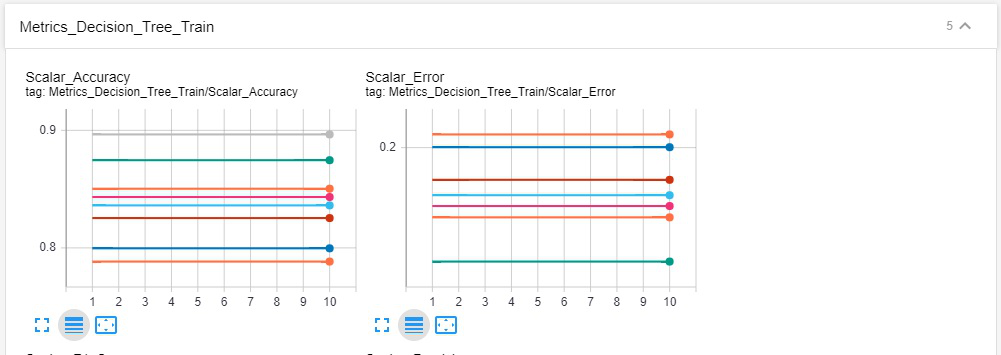

In [144]:
Image.open('Tree Train 1.jpg','r')

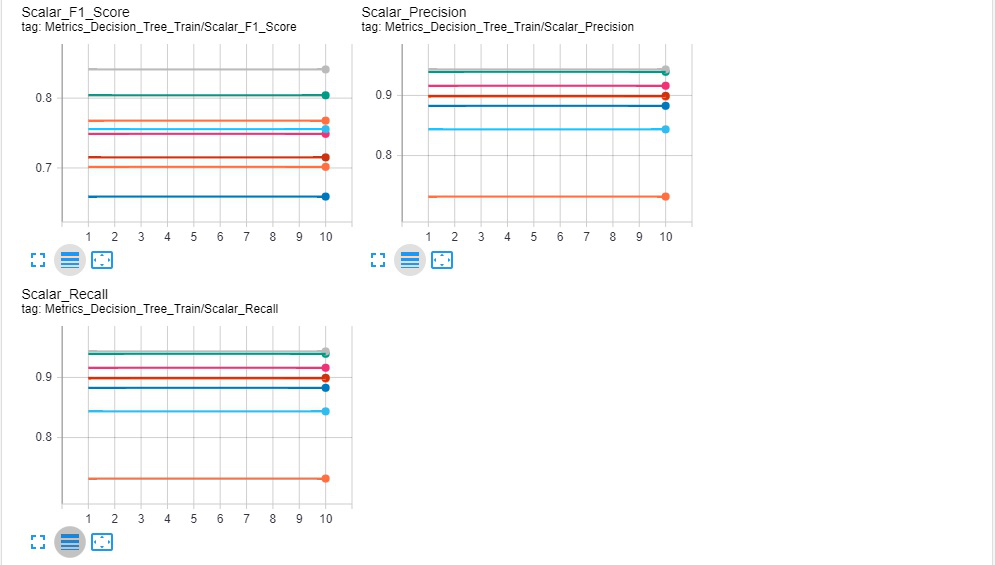

In [143]:
Image.open('Tree Train 2.jpg','r')

### SVM Train

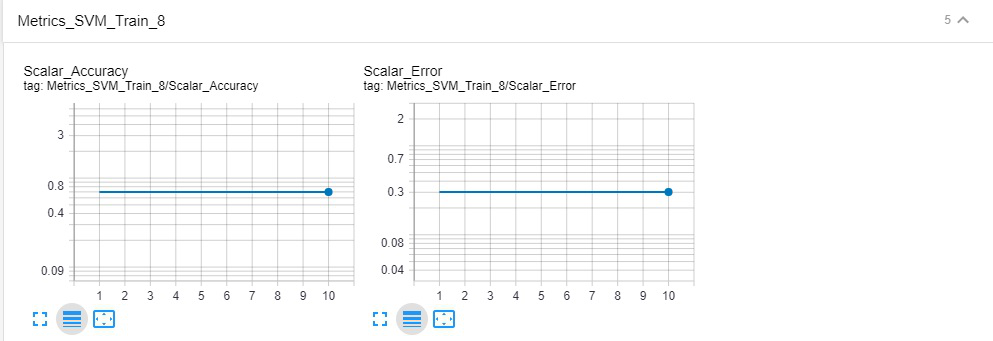

In [146]:
Image.open('SVM Train 1.jpg','r')

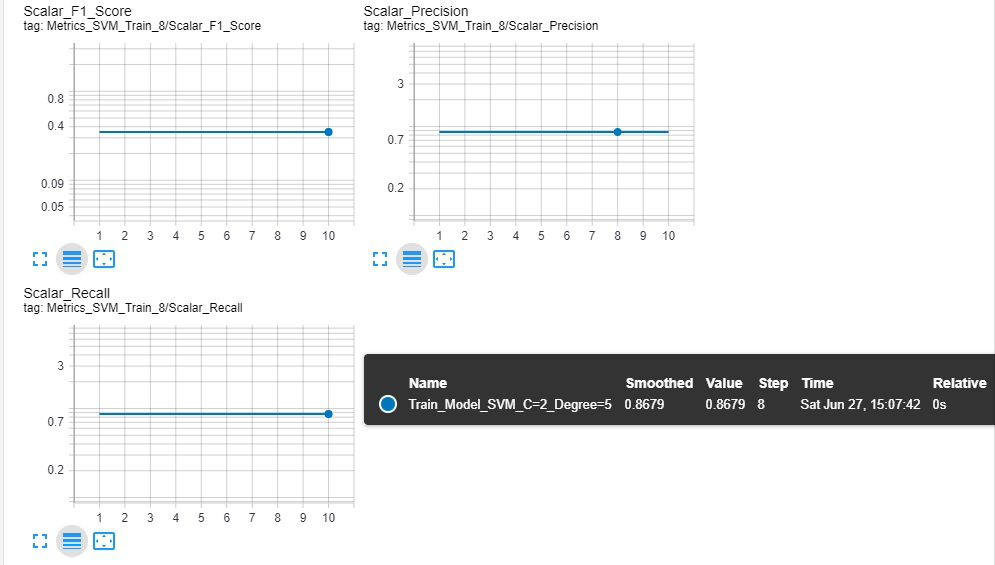

In [147]:
Image.open('SVM Train 2.jpg','r')

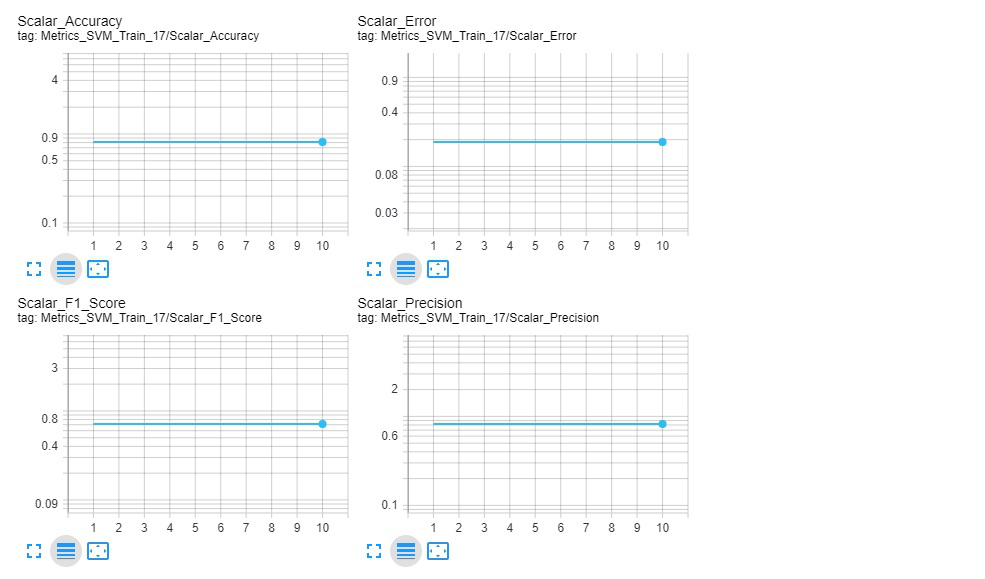

In [148]:
Image.open('SVM Train 3.jpg','r')

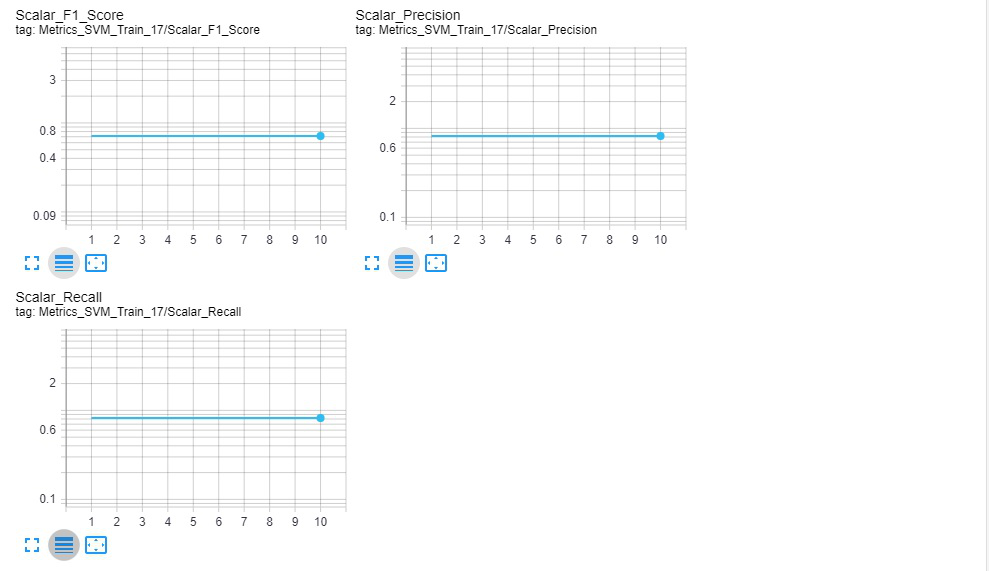

In [149]:
Image.open('SVM Train 4.jpg','r')

### Naive Bayes Train

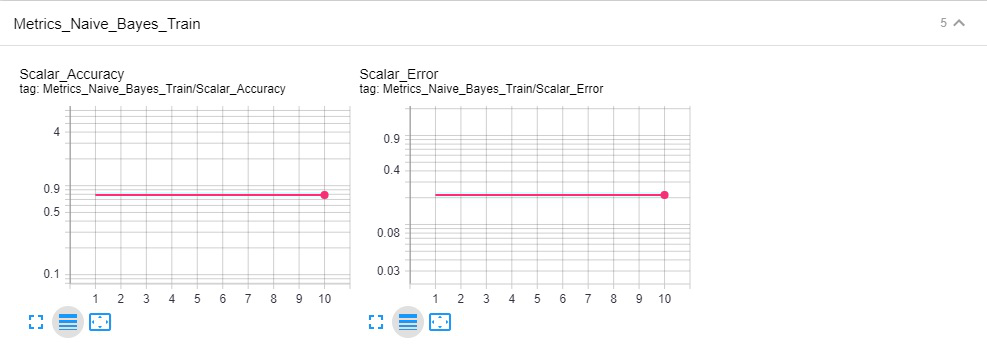

In [150]:
Image.open('Bayes Train 1.jpg','r')

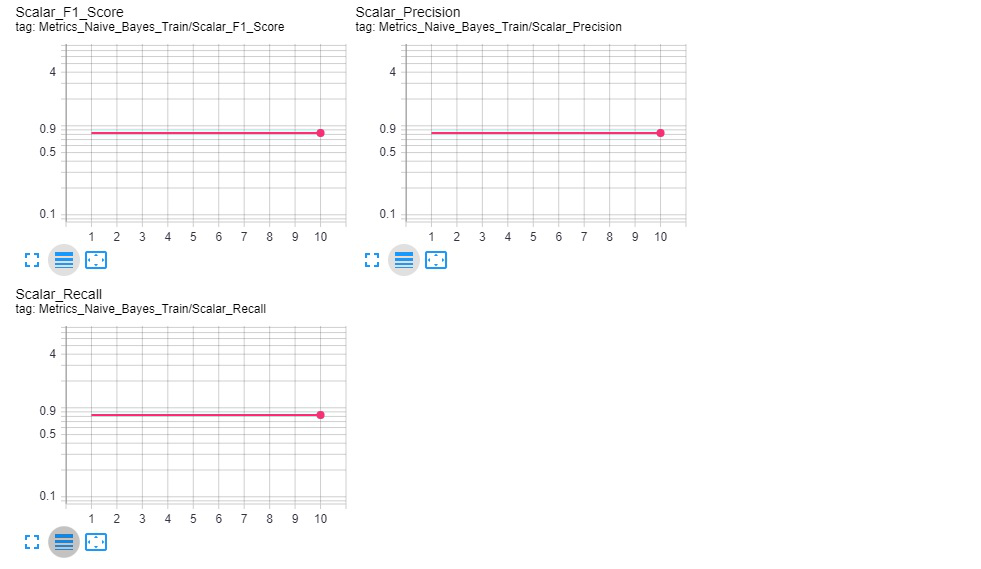

In [151]:
Image.open('Bayes Train 2.jpg','r')

### Logistic Regression Train

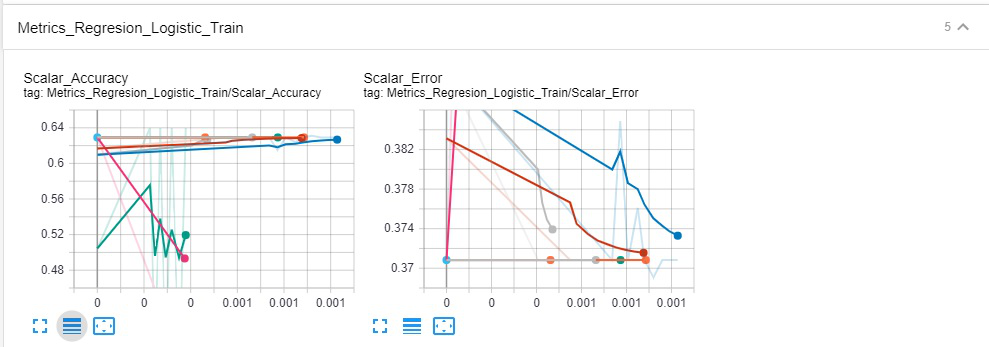

In [153]:
Image.open('RL Train 1.jpg','r')

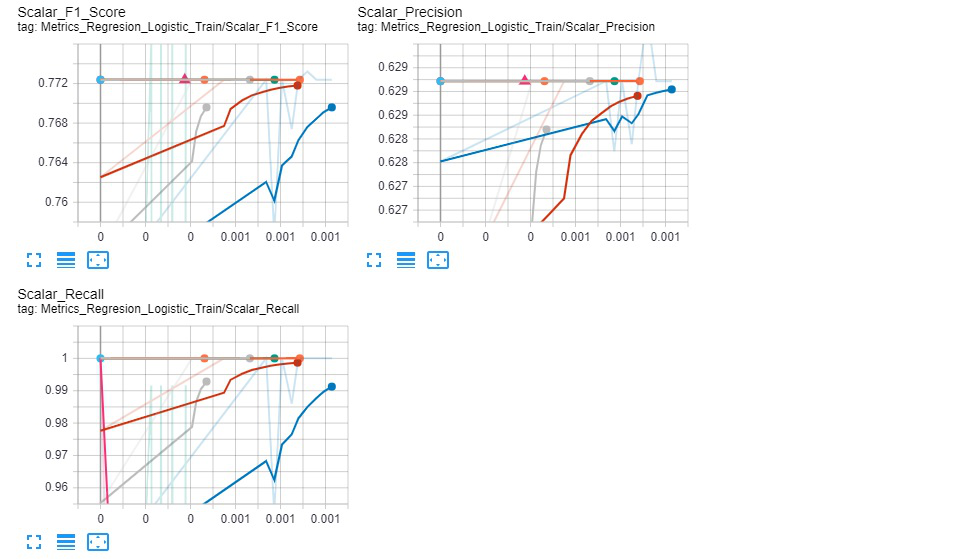

In [154]:
Image.open('RL Train 2.jpg','r')

**Para el caso del Árbol de Decisión con los datos Train:**

* Los experimentos que obtuvieron un Accuracy igual o superior del 80% fueron los que tenían un Depth mayor o igual a 2.

* En cuanto al Recall y Precision, aquellos árboles con Depth mayor o igual a 2 obtuvieron valores arriba del 80%.

* Para la métrica F1-Score, los árboles con Depth de 8 y 10 obtuvieron un resultado arriba del 80%.


**Para el algoritmo VSM con datos Train se corrieron varios experimentos variando el valor de C y de Degree:**

* Para valores de C pequeños (se probaron entre 0.25 y 10) y variando el Degree el resultado de Accuracy era menor del 80%, se obtuvieron resultados de alrederos del 68%.

* Para valores de C grandes se obtuvieron mejores resultados, con un valor de C = 100 y Degree = 3 el accuracy fue de 81%


**Para el caso del algoritmo Naive Bayes con los datos Train:**

* Se obtuvo un Accuracy del 78%.

* En cuanto al Recall y Precision se obtuvo un 83% para ambos.

* Para la métrica F1-Score se obtuvo 83%.

**Para el caso del algoritmo Regresión Logística se corrieron varios experimentos variando los hyper-parámetros de learning rate, tamaño de batch, factor de regularización de L1 y L2:**

* Se obtuvieron mejores resultados con un learning rate de 0.01, el tamaño de batch no influyó significativamente a variar los resultados.

* Con los datos de Train se obtuvieron mejores valores de accuray sin usar factores de regularización. El accuracy para este modelo fue el más bajo de los 4, llegando aproximadamente a un 63%.

* En cuanto al Recall se obtuvieron valores cercanos a 1 y con Precision alrededor de un 63% para ambos.

* Para la métrica F1-Score se obtuvo alrededor de 77%.

### Decision Tree Validation

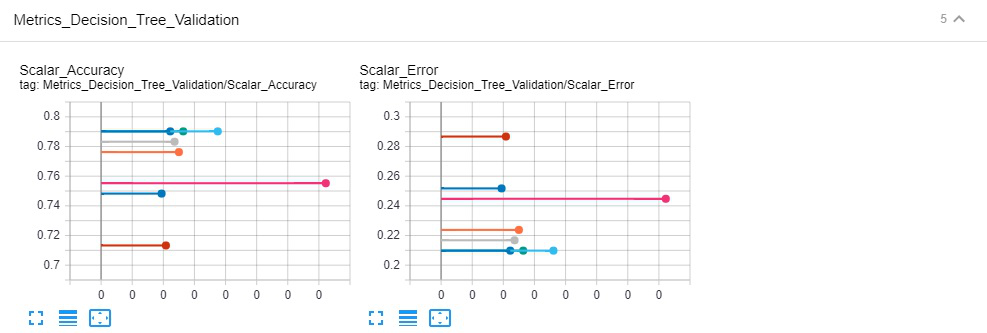

In [190]:
Image.open('Tree Val 1.jpg','r')

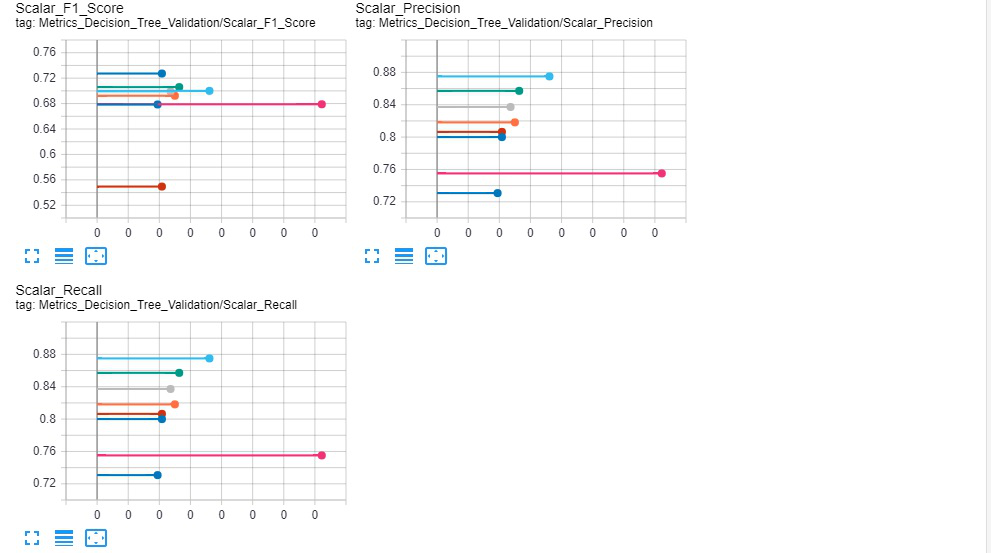

In [191]:
Image.open('Tree Val 2.jpg','r')

### SVM Validation

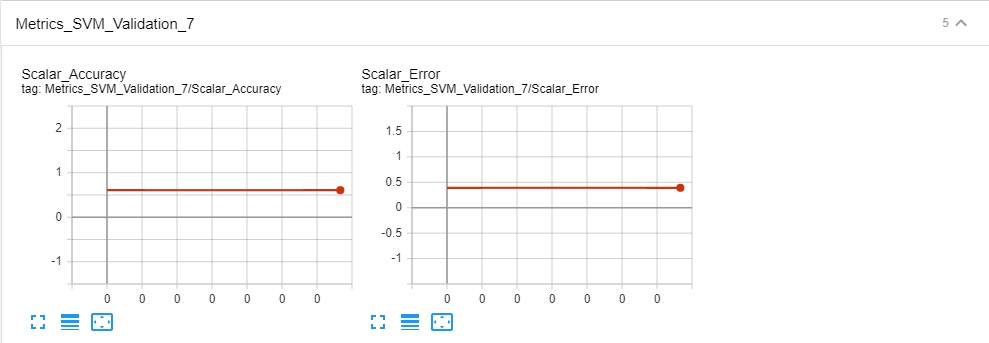

In [192]:
Image.open('SVM Val 1.jpg','r')

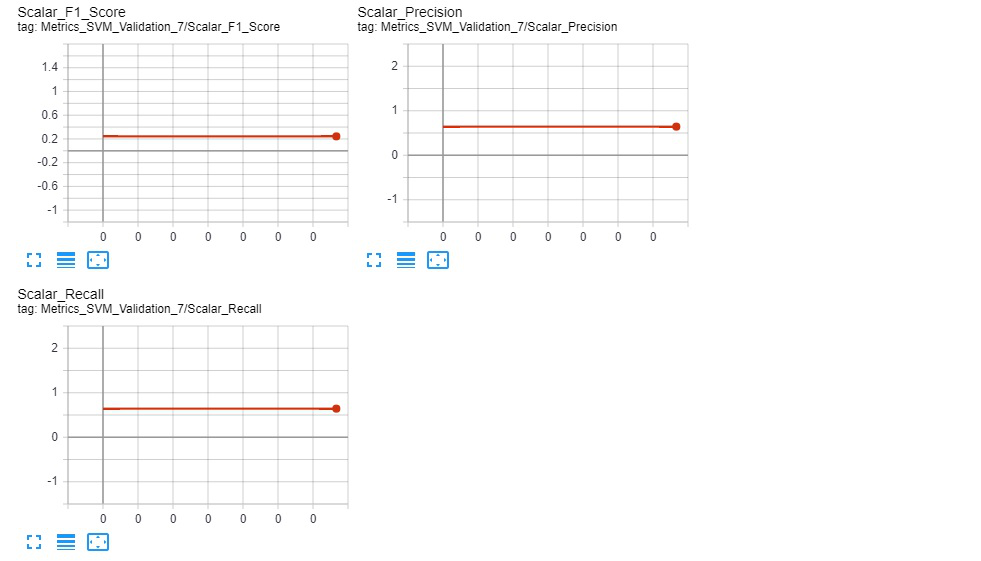

In [193]:
Image.open('SVM Val 2.jpg','r')

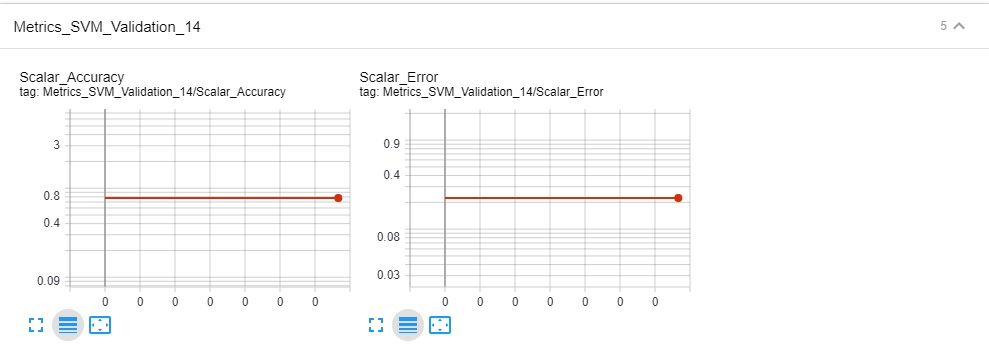

In [194]:
Image.open('SVM Val 3.jpg','r')

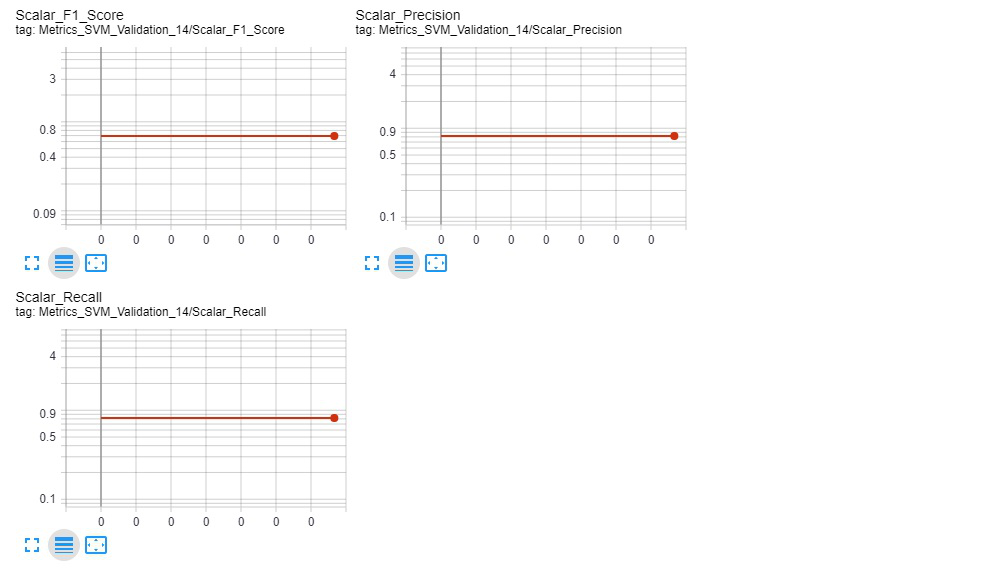

In [195]:
Image.open('SVM Val 4.jpg','r')

### Naive Bayes Validation

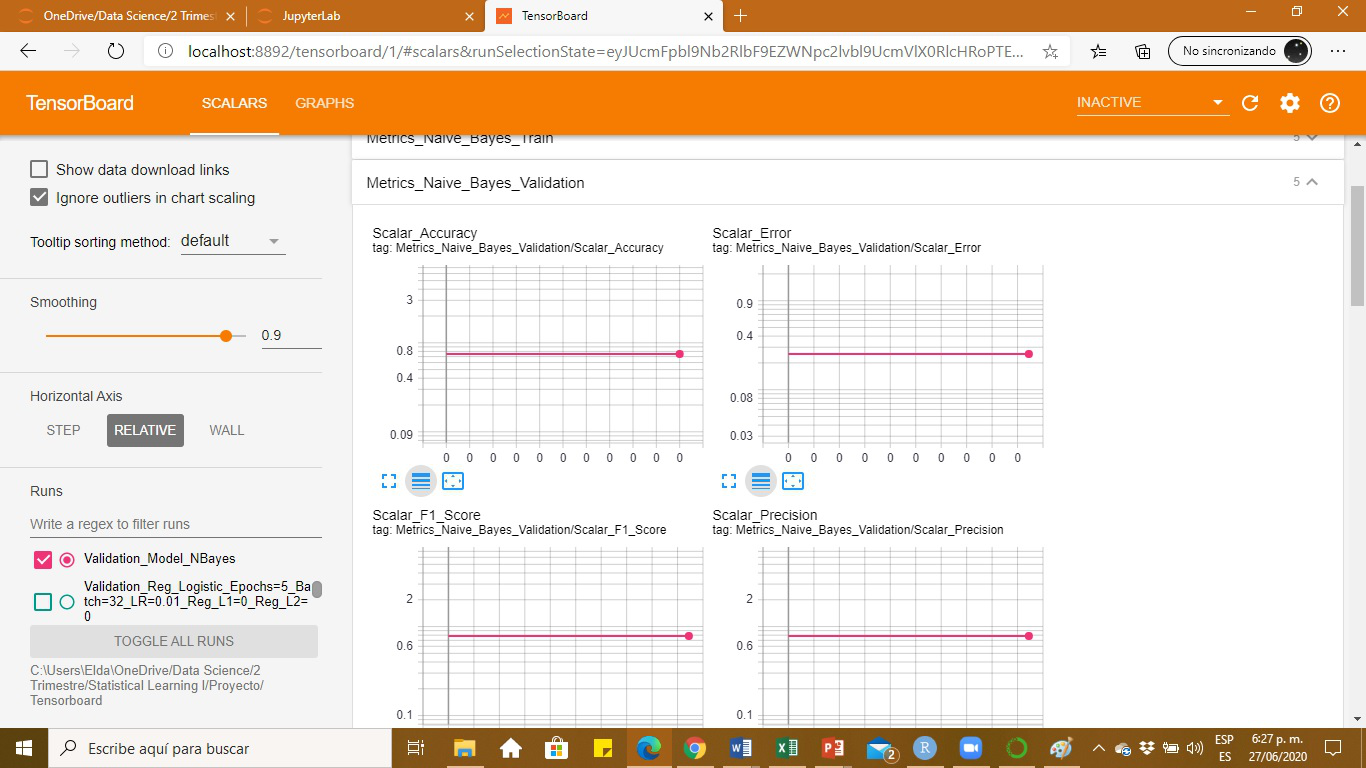

In [196]:
Image.open('Bayes Val 1.jpg','r')

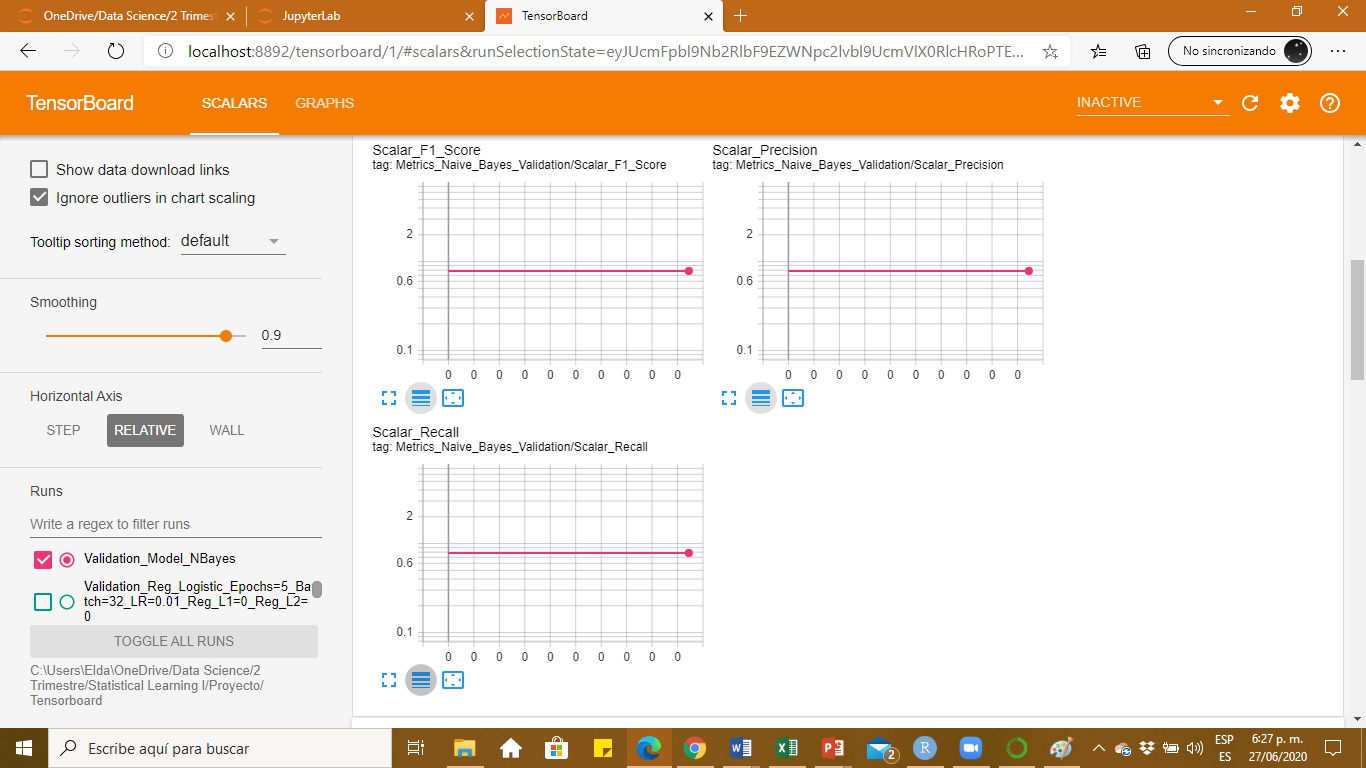

In [197]:
Image.open('Bayes Val 2.jpg','r')

### Logistic Regression Validation

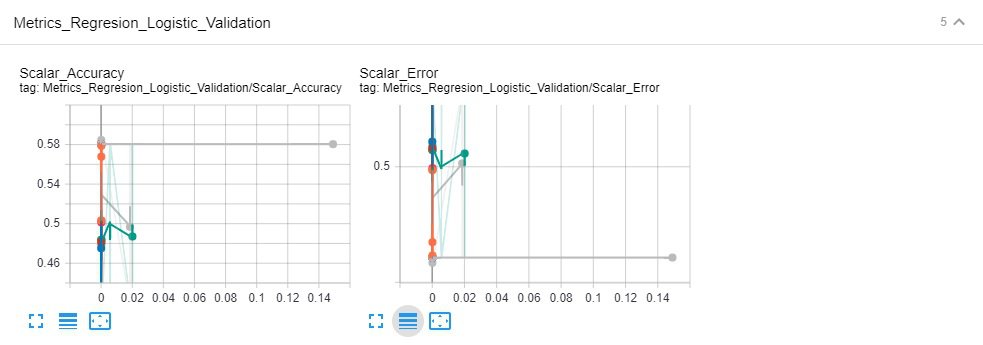

In [198]:
Image.open('RL Val 1.jpg','r')

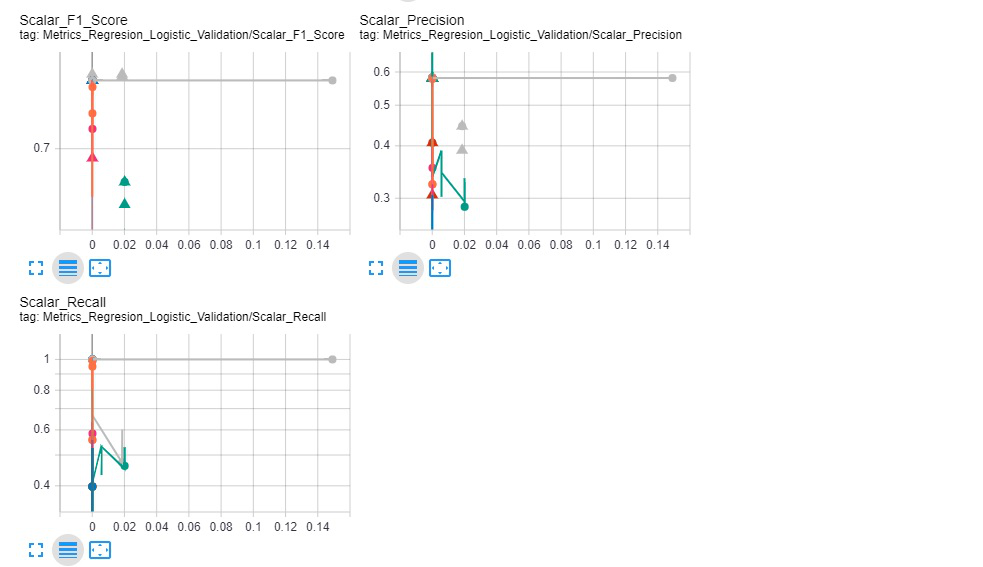

In [199]:
Image.open('RL Val 2.jpg','r')

**Para el caso del Árbol de Decisión con los datos Validation:**

* Los experimentos que obtuvieron un Accuracy cercano al 80% fueron los que tenían un Depth mayor o igual a 3. El mejor resultado de Accuracy se obtuvo con Depth = 3 y 5. El accuracy fue de 79%

* En cuanto al Recall y Precision, aquellos árboles con Depth de 3 y 5 obtuvieron valores un poco arriba del 85%.

* Para la métrica F1-Score, los árboles con Depth de 3, 5 y 10 obtuvieron un resultado alrededor del 70%.


**Para el algoritmo VSM con datos validation se corrieron varios experimentos variando el valor de C y de Degree:**

* Al igual que con los datos de Train, para valores de C pequeños (se probaron entre 0.25 y 10) y variando el Degree el resultado de Accuracy era menor del 80%, se obtuvieron resultados de alrederos del 60%.

* Para valores de C grandes se obtuvieron mejores resultados. El mejor resultado se obtuvo con un valor de C = 100 y Degree = 3, el accuracy fue de 78%


**Para el caso del algoritmo Naive Bayes con los datos Validation:**

* Se obtuvo un Accuracy del 78%. Similar al obtenido con los datos Train.

* En cuanto al Recall y Precision se obtuvo un 78% para ambos.

* Para la métrica F1-Score se obtuvo 78%. Las métricas estan cercanas a las obtenidas con datos Train.

**Para el caso del algoritmo Regresión Logística se corrieron los mismos experimentos variando los hyper-parámetros de learning rate, tamaño de batch, factor de regularización de L1 y L2:**

* Se obtuvieron mejores resultados con un learning rate de 0.01, el tamaño de batch no influyó significativamente a variar los resultados, similar al comportamiento con datos Train. Los hyper-parámetros con mejores resultados son learning rate = 0.01, tamaño de batch de 50, L1 y L2 de cero.

* Con los datos de Validation se obtuvieron mejores valores de accuray sin usar factores de regularización. El accuracy para este modelo fue el más bajo de los 4, llegando aproximadamente a un 58%.

* En cuanto al Recall se obtuvieron valores cercanos a 1 y con Precision alrededor de un 58% para ambos.

* Para la métrica F1-Score se obtuvo alrededor de 73%.

## Modelos Elegidos:

Analizando los resultados obtenidos con la evaluación de los datos Validation se escogen los siguientes modelos de clasificación:

* Decision Tree con depth = 3
* SVM con C = 100 y Degree = 3
* Naive Bayes
* Logistic Regression con learning rate = 0.01 y tamaño de batch = 50, L1 = L2 = 0



## Técnica K-Folds Cross Validation:

La validación cruzada o cross-validation es una técnica de re-muestreo usada para evaluar los modelos de ML.

En la validación K-fold cross-validation los datos de la muestra se dividen en K subconjuntos. Uno de los subconjuntos se utiliza como datos de prueba y el resto (K-1) como datos de entrenamiento. El proceso de validación cruzada es repetido durante k iteraciones, con cada uno de los posibles subconjuntos de datos de prueba. Finalmente se realiza la media aritmética de los resultados de cada iteración para obtener un único resultado.

Esto quiere decir que se tiene un parámetro k, el cual indica el número de grupos en que los datos se van a dividir. Es una técnica frecuentemente utilizada porque es simple y generalmente da buenos resultados para reducir el error por sesgo.

Procedimiento en general:

* Mezclar los datos aleatoriamente
* Dividir el conjunto de datos en k grupos
* Para cada grupo:
    * Tomar el grupo como un dataset de validación
    * Tomar el resto de grupos como un dataset de entrenamiento
    * Entrenar el modelo con el dataset de entrenamiento
    * Evaluar el modelo con el dataset de validación
    * Registrar las métricas de evaluación 
    * Repetir el procedimiento cambiando el grupo de prueba por el siguiente
* Promediar las métricas de evaluación resultantes para evaluar el modelo en general

Cada muestra tiene la oportunidad de ser usada en el dataset de validación 1 vez y k-1 veces en el de entrenamiento.

<img src="https://www.researchgate.net/profile/Mingchao_Li/publication/331209203/figure/fig2/AS:728070977748994@1550597056956/K-fold-cross-validation-method.png"/>

### Aplicación en el Proyecto:

Esta técnica pudo haberse usado en el proyecto de la siguiente manera:

* Se separa primero del dataset completo una porción para el dataset de pruebas que se usa hasta el final
* Queda entonces un dataset con el que se empleará la técnica de k-folds cross validation
* Se pudo haber fijado por ejemplo un K = 6
* Para cada uno de los 4 modelos y los experimentos se emplea la técnica:
    * El dataset queda dividido en 6 grupos, en la primera ronda se entrena cada modelo con los primeros 5 grupos y se valida con el grupo 6.
    * En la segunda ronda se entrena el modelo con los grupos de 2 a 6 y se valida con el 1
    * Se repite el proceso hasta que se validan los modelos con cada uno de los grupos, es decir se repite 6 veces.
    * Se registran las 4 métricas de evaluación para cada modelo creado.
* Para cada modelo se obtuvieron 6 validaciones con sus respectivas métricas, se calcula el promedio para cada una.
* Con base al resultados final de las métricas se escogen los modelos que pasarán a la parte final de prueba utilizando el dataset que se reservó en un inicio para este fin.

## Evaluación Final

In [643]:
#Funcion arbol de decision

def test_tree(X, Y, X_predict, Y_true, depth):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Decision_Tree_Test"):
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Validation_Model_Decision_Tree_'+'Depth='+str(depth)), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    return (prediction, clf)
    

In [644]:
def test_SVM(X, Y, X_predict, Y_true, C, degree):
    clf = svm.SVC(kernel = 'poly', C = C, degree=degree)
    clf = clf.fit(X, Y)
    
    y_true = Y_true
    
    prediction = clf.predict(X_predict)
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_SVM_Test"):
        
        # Accuracy
        accuracy = accuracy_score(y_true, prediction, normalize=True) #con True el resultado es en fraccion
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = precision_score(y_true, prediction, average='binary')
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = precision_score(y_true, prediction, average='binary')
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = f1_score(y_true, prediction, average='binary')
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Validation_Model_SVM_'+'C='+str(C)+'_Degree='+str(degree)), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    #print(accuracy)
    
    #print(confusion_matrix(y_true,prediction))
    #print(classification_report(y_true,prediction))
        
    return (prediction, clf)
    

In [666]:
def test_naive_bayes(X, Y, predict, y_true):
    
    data = pd.concat([X,Y],axis=1)
    
    #Probabilidades Variables Categoricas
    
    #Embarked
    PECY = (len(X[(X.iloc[:,1] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PEQY = (len(X[(X.iloc[:,2] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PESY = (len(X[(X.iloc[:,3] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PECN = (len(X[(X.iloc[:,1] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PEQN = (len(X[(X.iloc[:,2] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PESN = (len(X[(X.iloc[:,3] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Class
    PCLY = (len(X[(X.iloc[:,4] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCMY = (len(X[(X.iloc[:,5] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PCUY = (len(X[(X.iloc[:,6] == 1) & (Y == 1)]) / len(Y[(Y == 1)]))
    PCLN = (len(X[(X.iloc[:,4] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCMN = (len(X[(X.iloc[:,5] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PCUN = (len(X[(X.iloc[:,6] == 1) & (Y == 0)]) / len(Y[(Y == 0)]))
    
    # Sex
    PSFY = (len(X[(X.iloc[:,7] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSMY = (len(X[(X.iloc[:,8] == 1) & (Y == 1)]) / len(Y[(Y == 1)])) 
    PSFN = (len(X[(X.iloc[:,7] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 
    PSMN = (len(X[(X.iloc[:,8] == 1) & (Y == 0)]) / len(Y[(Y == 0)])) 

    #Probabilidad Edad
    desY = data.iloc[:,0][data.iloc[:,9] == 1].std()
    mediaY = data.iloc[:,0][data.iloc[:,9] == 1].mean()

    desN = data.iloc[:,0][data.iloc[:,9] == 0].std()
    mediaN = data.iloc[:,0][data.iloc[:,9] == 0].mean()

    PEdadY = np.exp(-np.power((X.iloc[:,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadN = np.exp(-np.power((X.iloc[:,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))

    #Probabilidad Y/N
    PY = len(data[(data.iloc[:,9] == 1)]) / len(X)
    PN = len(data[(data.iloc[:,9] == 0)]) / len(X)

    #Vectores Y/N
    vector_yes = np.array([[PECY, PEQY, PESY, PCLY, PCMY, PCUY, PSFY, PSMY]])
    vector_no = np.array([[PECN, PEQN, PESN, PCLN, PCMN, PCUN, PSFN, PSMN]])

    #Calculo Probabilidad
    matriz_yes = pd.concat([PEdadY, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_yes], axis = 1) 
    matriz_no = pd.concat([PEdadN, X.iloc[:,[1,2,3,4,5,6,7,8]] * vector_no], axis = 1) 
    
    
    b = matriz_yes[matriz_yes != 0].fillna(1)
    n = np.shape(matriz_yes)[1]
    a = b.iloc[:,0]
    for i in range(1, n):
        a = a * b.iloc[:,i]
    
    
    d = matriz_no[matriz_no != 0].fillna(1)
    c = d.iloc[:,0]
    for i in range(1, n):
        c = c * d.iloc[:,i]
    
    
    PYF = a * PY
    PNF = c * PN
    
    
    #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

    #Matriz Probabilidades
    matriz = pd.concat([PTN,PTY],axis=1)
    matriz.columns = [0,1]

    #Prediccion
    prediction = matriz.idxmax(axis = 1) 
    
    
    #-------------------------------------------------------Datos Validation--------------------------------------------#
    
    data2 = pd.concat([predict,y_true],axis=1)

    #Probabilidad Edad
    desY = data2.iloc[:,0][data2.iloc[:,9] == 1].std()
    mediaY = data2.iloc[:,0][data2.iloc[:,9] == 1].mean()

    desN = data2.iloc[:,0][data2.iloc[:,9] == 0].std()
    mediaN = data2.iloc[:,0][data2.iloc[:,9] == 0].mean()

    PEdadYT = np.exp(-np.power((predict.iloc[:,0]-mediaY),2)/(2*np.power(desY,2))) / (np.power(2*np.pi*np.power(desY,2),0.5)) 
    PEdadNT = np.exp(-np.power((predict.iloc[:,0]-mediaN),2)/(2*np.power(desN,2))) / (np.power(2*np.pi*np.power(desN,2),0.5))

    
    #Calculo Probabilidad
    matriz_yes = pd.concat([PEdadYT, predict.iloc[:,[1,2,3,4,5,6,7,8]] * vector_yes], axis = 1) 
    matriz_no = pd.concat([PEdadNT, predict.iloc[:,[1,2,3,4,5,6,7,8]] * vector_no], axis = 1) 
    
    
    b = matriz_yes[matriz_yes != 0].fillna(1)
    n = np.shape(matriz_yes)[1]
    a = b.iloc[:,0]
    for i in range(1, n):
        a = a * b.iloc[:,i]
    
    
    d = matriz_no[matriz_no != 0].fillna(1)
    c = d.iloc[:,0]
    for i in range(1, n):
        c = c * d.iloc[:,i]
    
    
    PYF = a * PY
    PNF = c * PN
    
    
    #Normalizacion de la probabilidad
    PTY = PYF / (PYF + PNF)
    PTN = PNF / (PYF + PNF)

    #Matriz Probabilidades
    matriz = pd.concat([PTN,PTY],axis=1)
    matriz.columns = [0,1]

    #Prediccion
    prediction_validation = matriz.idxmax(axis = 1) 
    
    
    #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Naive_Bayes_Test"):
        
        confusion = tf.math.confusion_matrix(y_true, prediction_validation)
        
        # Accuracy
        accuracy = (len(predict) - np.sum(np.abs(prediction_validation - y_true))) / len(predict)
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = 2 * (precision * recall) / (precision + recall)
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        print(session.run(confusion))
        print(session.run(precision))
        print(session.run(recall))
        print(session.run(f1))

        writer = tf.summary.FileWriter(('./Validation_Model_NBayes'), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)

    #print(accuracy)

    return (np.array(prediction_validation), vector_yes, vector_no)
    

In [704]:
def test_reg_logistic(lr, epochs, batch, one_hot, matriz_X, matriz_test, hotTest, L1, L2):
    
    tf.reset_default_graph()
    g = tf.Graph()
    
    n = len(matriz_X)
    shape = np.shape(matriz_X)
    total_iteraciones = int(n/batch)
    
    
    with g.as_default():
   
        matriz_x = tf.placeholder(dtype=tf.float32, shape=[None,shape[1]], name = "matriz_x")
        matriz_w = tf.get_variable(dtype=tf.float32, initializer=tf.truncated_normal,shape=[shape[1],2], name = "matriz_w")
        intercepto = tf.get_variable(dtype=tf.float32, shape=[2], initializer=tf.zeros_initializer(), name="Intercepto")
        m_OneHot = tf.placeholder(dtype=tf.float32, shape=[None,2], name = "matriz_one_hot")
        #m_OneHotTest = tf.placeholder(dtype=tf.float32, shape=[None,2])

    
        with tf.name_scope("Hipotesis"):
            logit = tf.matmul(matriz_x, matriz_w, name = "Logit") + intercepto
            costo = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels = m_OneHot), 
                                   name = "Costo") + L1 * tf.reduce_sum(tf.math.abs(matriz_w)) + L2 * tf.reduce_sum(tf.math.pow(matriz_w,2))
            scalar_costo = tf.summary.scalar('Costo Modelo RL', costo)

    
        with tf.name_scope("Gradiente"):
            gradiente = tf.gradients(costo, [matriz_w], name = "Gradient")
            gradiente2 = gradiente[0]
    

        with tf.name_scope("Parametros"):
            w_actual = tf.add(tf.multiply(gradiente2, -lr), matriz_w)
            matriz_w = matriz_w.assign(w_actual)
    
    
        prediccionT = tf.nn.sigmoid(logit, name = "Prediccion")
    
        #-------------------TENSORFLOW METRICS-------------------#
    
        with tf.name_scope("Metrics_Regresion_Logistic_Test"):
            confusion = tf.math.confusion_matrix(hotTest.iloc[:,1], prediccionT[:,1])
        
            # Accuracy
            accuracy = (confusion[0,0] + confusion[1,1]) / len(hotTest)
            scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

            # Error
            error = 1 - accuracy
            scalar_error = tf.summary.scalar('Scalar_Error', error)

            # Precision
            precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
            scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

            # Recall
            recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
            scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

            # F1-Score
            f1 = 2 * (precision * recall) / (precision + recall)
            scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

        
        with tf.train.MonitoredSession() as session:
            
            writer = tf.summary.FileWriter(('./Validation_Reg_Logistic'+'_Epochs='+str(epochs)
                                            +'_Batch='+str(batch)+'_LR='+str(lr)
                                            +'_Reg_L1='+str(L1)+'_Reg_L2='+str(L2)), session.graph)

            for i in range(epochs):
    
                feed_dict = {matriz_x: matriz_X, m_OneHot: one_hot}
                #print(session.run(costo, feed_dict = feed_dict))
                session.run(logit, feed_dict = feed_dict)
                sc = session.run(scalar_costo,feed_dict=feed_dict)
                
                for j in range(total_iteraciones):   
                    muestra_inicio = j*batch
                    muestra_fin = muestra_inicio + batch
                    X =  matriz_X[muestra_inicio:muestra_fin]
                    hot = one_hot[muestra_inicio:muestra_fin]
      
                    feed_dict2 = {matriz_x: X, m_OneHot: hot}
                    session.run(gradiente, feed_dict = feed_dict2)
                    session.run(w_actual, feed_dict = feed_dict2)
                    session.run(matriz_w, feed_dict = feed_dict2)
                    p = session.run(prediccionT, feed_dict = feed_dict2)
                
                
                feed_dict3 = {matriz_x: matriz_test, m_OneHot: hotTest}
                session.run(prediccionT, feed_dict = feed_dict3)
                session.run(confusion, feed_dict = feed_dict3)
                sa = session.run(scalar_accuracy, feed_dict = feed_dict3)
                se = session.run(scalar_error, feed_dict = feed_dict3)
                sp = session.run(scalar_precision, feed_dict = feed_dict3)
                sr = session.run(scalar_recall, feed_dict = feed_dict3)
                sf = session.run(scalar_f1, feed_dict = feed_dict3)
                writer.add_summary(sa, epochs+1)
                writer.add_summary(se, epochs+1)
                writer.add_summary(sp, epochs+1)
                writer.add_summary(sr, epochs+1)
                writer.add_summary(sf, epochs+1)
            
            #Prediccion
            feed_dict3 = {matriz_x: matriz_test, m_OneHot: hotTest}
            session.run(costo, feed_dict = feed_dict3)
            session.run(logit, feed_dict = feed_dict3)
            predict = session.run(prediccionT, feed_dict = feed_dict3)
            num = np.argmax(predict,axis=1).reshape(1,-1)
            
            #print("Accuracy:")
            #print(session.run(accuracy, feed_dict = feed_dict3))
            #print(session.run(confusion, feed_dict = feed_dict3))


            return(num, session.run(matriz_w, feed_dict = feed_dict))
    

In [515]:
def evaluation_final(y_true):
    from sklearn.metrics import confusion_matrix

    # Call Functions
    model1 = test_tree(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Test2.iloc[:,21]), 3).reshape(len(Test2),1)


    model2 = test_SVM(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
           Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], 100, 3).reshape(len(Test2),1)

    model3 = test_naive_bayes(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
                       Train2.iloc[:,21],
                       Test2.iloc[:,[2,12,13,14,15,16,17,18,19]],
                       Test2.iloc[:,21]).reshape(len(Test2),1)

    model4 = test_reg_logistic(0.01, 5, 50, 
             Train2.iloc[:,[20,21]], 
             Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Test2.iloc[:,[20,21]], 0,0).reshape(len(Test2),1)
    

    #Arreglo con Prediccion Final
    matriz_test = np.concatenate((model1,model2, model3,model4), axis = 1)
    moda = stats.mode(matriz_test, axis = 1)[0] 
    confusion = confusion_matrix(np.array(y_true).reshape(-1,1), moda.reshape(-1,1))

    
     #-------------------TENSORFLOW METRICS-------------------#
    
    with tf.name_scope("Metrics_Final_Test"):
        
        # Accuracy
        accuracy = (confusion[0,0] + confusion[1,1]) / len(y_true)
        scalar_accuracy = tf.summary.scalar('Scalar_Accuracy', accuracy)

        # Error
        error = 1 - accuracy
        scalar_error = tf.summary.scalar('Scalar_Error', error)

        # Precision
        precision = confusion[0,0] / (confusion[0,0] + confusion[1,0])
        scalar_precision = tf.summary.scalar('Scalar_Precision', precision)

        # Recall
        recall = confusion[0,0] / (confusion[0,0] + confusion[0,1])
        scalar_recall = tf.summary.scalar('Scalar_Recall', recall)

        # F1-Score
        f1 = 2 * (precision * recall) / (precision + recall)
        scalar_f1 = tf.summary.scalar('Scalar_F1_Score', f1)

    
    with tf.train.MonitoredSession() as session:
        
        writer = tf.summary.FileWriter(('./Final_Prediction'), session.graph)
    
        for i in range(10):
    
            sa = session.run(scalar_accuracy)
            se = session.run(scalar_error)
            sp = session.run(scalar_precision)
            sr = session.run(scalar_recall)
            sf = session.run(scalar_f1)
            writer.add_summary(sa, i+1)
            writer.add_summary(se, i+1)
            writer.add_summary(sp, i+1)
            writer.add_summary(sr, i+1)
            writer.add_summary(sf, i+1)
                                            
    return(accuracy)
    

In [521]:
accuracy_final = evaluation_final(Test2.iloc[:,21]).reshape(1,-1)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[87 21]
 [14 57]]
0.8613861386138614
0.8055555555555556
0.832535885167464
INFO:tensorflow:Summary name Costo Modelo RL is illegal; using Costo_Modelo_RL instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [522]:
accuracy_final

array([[0.83240223]])

### Metricas Datos Test

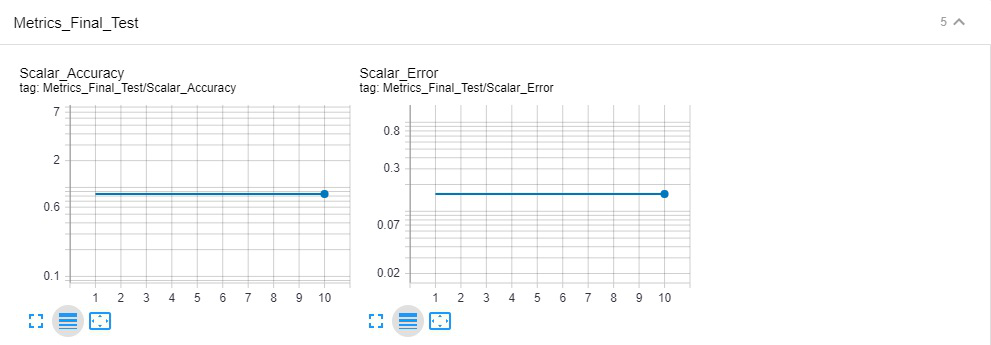

In [517]:
Image.open('Final 1.jpg','r')

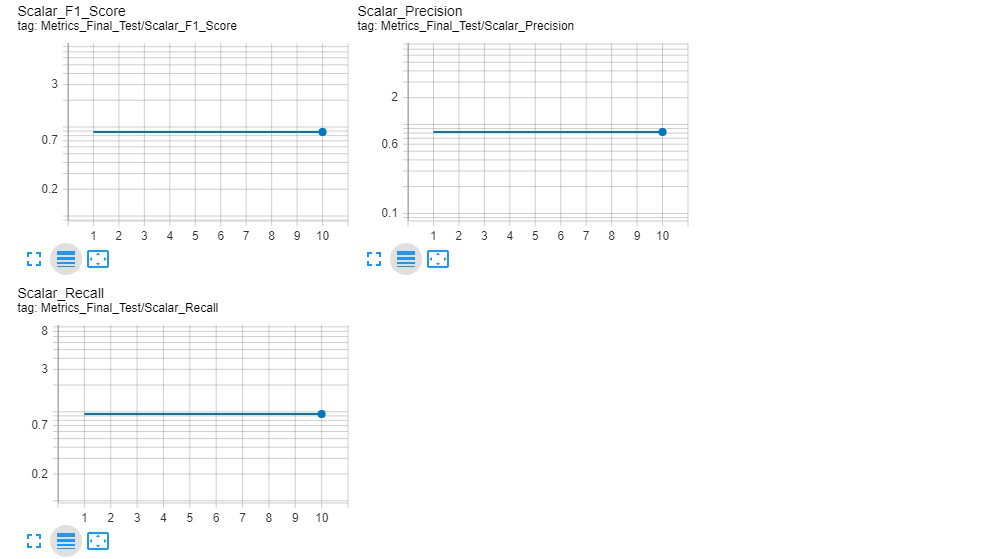

In [518]:
Image.open('Final 2.jpg','r')

# Conclusiones:

* Al realizar la evaluación final con los modelos elegidos en el Ensemble Learning se obtuvo un Accuracy de 0.8324, por lo que los modelos elegidos para la predicción cumplen con el nivel de accuracy mínimo requerido.

* En cuanto a las demás métricas de evaluación para la evaluación final; una precision = 0.82, recall = 0.94 y f1_score = 0.87, por lo cual se puede concluir que el modelo tiene un aceptable nivel de fiabilidad.

* Se puede observar que al realizar la técnica de Ensemble Learning se obtiene un incremento en las métricas de evaluación, ya que el accuracy con los datos de validación se obtuvo un resultado un poco por debajo del 80%; sin embargo, al combinar los 4 modelos de predicción se logró superar el valor de referencia de 80%.

* Se pudo observar durante la experimentación que es conveniente jugar con los hyper-parámetros para encontrar aquellos que producen mejores resultados en las predicciones. Es conveniente hacer varios experimentos con los datos de entrenamiento y repetirlos con los datos de validación para comparar resultados y elegir los mejores hyper-parámetros.

* Se emplearon técnicas de feature engineering tales como eliminación de datos NAN en la variable de edad por medio de promedio y reemplazo de datos. A su vez, se determinó desde el inicio que la variable Cabin no iba a tener participación en el análisis dada el gran porcentaje de NAN en la misma, lo cual pudo desviar el estudio. También se empleó one-hot-encoding para tratar con las variables categóricas.Estas técnicas al final fueron de ayuda para obtener mejores resultados en las predicciones.



# Recomendaciones:

* Se recomienda realizar un muestreo aleatorio de los datos para obtener mejores resultados, por lo que es conveniente reordenarlos al inicio al momento de hacerl el muestreo para cumplir con tal fin.

* Es conveniente hacer un análisis exploratorio de la data en general antes de empezar con el proceso de entrenamiento, ya que de esa forma se limpian los datos, se puede tener una idea general de que features se podrían utilizar durante el entrenamiento y observar cualquier inconsistencia en los datos que se puede tratar más adelante con técnicas de feature engineering.

* El empleo de técnicas de feature engineering es altamente recomendado para tener datos más homogéneos, por lo que se recomienda su empleo al inicio del análisis.

* Durante el análisis una de las preocupaciones que me surgió fue el modelo de Logistic Regresion, al inicio de estar elaborando los modelos consideré que sería el que mejores resultados brindaría; sin embargo, al empezar a realizar las pruebas con los datasets de entrenamiento y validación este modelo no generó tan buenos resultados. Sin embargo, los otros 3 modelos brindaban resultados más favorables, por tanto es muy recomendable emplear Ensemble Learning para mejorar el rendimiento en las predicciones.

# Deployment

## Guardado de Modelos

In [762]:
_, model_tree = test_tree(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21],
         Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Test2.iloc[:,21]),3)

_, model_VSM = test_SVM(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
                     Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], np.array(Test2.iloc[:,21]), 100, 3)

_, model_bayes1, model_bayes0 = test_naive_bayes(Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], Train2.iloc[:,21], 
                               Test2.iloc[:,[2,12,13,14,15,16,17,18,19]],
                               Test2.iloc[:,21])

_, model_RL = test_reg_logistic(0.01, 5, 50, 
             Train2.iloc[:,[20,21]], 
             Train2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Test2.iloc[:,[2,12,13,14,15,16,17,18,19]], 
             Test2.iloc[:,[20,21]],0, 0)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[[87 21]
 [14 57]]
0.8613861386138614
0.8055555555555556
0.832535885167464
INFO:tensorflow:Summary name Costo Modelo RL is illegal; using Costo_Modelo_RL instead.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


## Creacion de Archivos PKL

In [761]:
joblib_file = "joblib_model_tree.pkl"  
joblib.dump(model_tree, joblib_file)

joblib_file2 = "joblib_model_VSM.pkl"  
joblib.dump(model_VSM, joblib_file2)

joblib_file3 = "joblib_model_bayes1.pkl"  
joblib.dump(model_bayes1, joblib_file3)

joblib_file4 = "joblib_model_bayes0.pkl"  
joblib.dump(model_bayes0, joblib_file4)

joblib_file5 = "joblib_model_RL.pkl"  
joblib.dump(model_RL, joblib_file5)

['joblib_model_RL.pkl']